H&M Personalized Fashion Recommendations

Provide product recommendations based on previous purchases

Dataset Link: https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from pathlib import Path
import plotly.express as px
path = Path("C:/Users/91983/Desktop/H&M/")
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"C:/Users/91983/Desktop/H&M/images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass
articles_df = pd.read_csv(path / "C:/Users/91983/Desktop/H&M/articles.csv", dtype = {'article_id': str})
train_df = pd.read_csv(path / "C:/Users/91983/Desktop/H&M/transactions_train.csv", dtype = {'article_id': str})
customer  = pd.read_csv(path / "C:/Users/91983/Desktop/H&M/customers.csv")
train_df["t_dat"] = pd.to_datetime(train_df["t_dat"])
monthly_df = train_df.query("'2020-9-1' <= t_dat")
weekly_df = train_df.query("'2020-9-16' <= t_dat")
sales_counts = Counter(train_df.article_id)
for i in range(len(articles_df)):
    articles_df.at[i, "sales_count"] = sales_counts[articles_df.at[i, "article_id"]]
monthly_sales_counts = Counter(monthly_df.article_id)
for i in range(len(articles_df)):
    articles_df.at[i, "monthly_sales_count"] = monthly_sales_counts[articles_df.at[i, "article_id"]]
weekly_sales_counts = Counter(weekly_df.article_id)
for i in range(len(articles_df)):
    articles_df.at[i, "weekly_sales_count"] = weekly_sales_counts[articles_df.at[i, "article_id"]]

Getting an overview of the datasets

In [3]:
print(articles_df.shape)
print(train_df.shape)
print(customer.shape)

(105542, 28)
(31788324, 5)
(1371980, 7)


In [4]:
articles_df.head().T

,0,1,2,3,4
article_id,0108775015,0108775044,0108775051,0110065001,0110065002
product_code,108775,108775,108775,110065,110065
prod_name,Strap top,Strap top,Strap top (1),OP T-shirt (Idro),OP T-shirt (Idro)
product_type_no,253,253,253,306,306
product_type_name,Vest top,Vest top,Vest top,Bra,Bra
product_group_name,Garment Upper body,Garment Upper body,Garment Upper body,Underwear,Underwear
graphical_appearance_no,1010016,1010016,1010017,1010016,1010016
graphical_appearance_name,Solid,Solid,Stripe,Solid,Solid
colour_group_code,9,10,11,9,10
colour_group_name,Black,White,Off White,Black,White


In [5]:
train_df.head().T

,0,1,2,3,4
t_dat,2018-09-20 00:00:00,2018-09-20 00:00:00,2018-09-20 00:00:00,2018-09-20 00:00:00,2018-09-20 00:00:00
customer_id,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,00007d2de826758b65a93dd24ce629ed66842531df6699...,00007d2de826758b65a93dd24ce629ed66842531df6699...,00007d2de826758b65a93dd24ce629ed66842531df6699...
article_id,0663713001,0541518023,0505221004,0685687003,0685687004
price,0.050831,0.030492,0.015237,0.016932,0.016932
sales_channel_id,2,2,2,2,2


In [6]:
customer.head().T

,0,1,2,3,4
customer_id,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...
FN,NaN,NaN,NaN,NaN,1.0
Active,NaN,NaN,NaN,NaN,1.0
club_member_status,ACTIVE,ACTIVE,ACTIVE,ACTIVE,ACTIVE
fashion_news_frequency,NONE,NONE,NONE,NONE,Regularly
age,49.0,25.0,24.0,54.0,52.0
postal_code,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Basic Exploration for each Dataset

Customer Dataset

In [7]:
100*customer.isnull().sum()/customer.shape[0]

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64

In [8]:
customer.nunique()

customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [9]:
customer['FN'].value_counts()

1.0    476930
Name: FN, dtype: int64

In [10]:
customer['Active'].value_counts()

1.0    464404
Name: Active, dtype: int64

In [11]:
customer['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [12]:
customer['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

<AxesSubplot:xlabel='Active', ylabel='Count'>

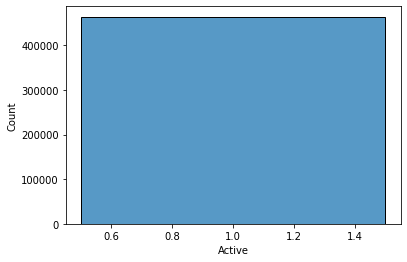

In [13]:
import seaborn as sns
sns.histplot(customer['Active'])

<AxesSubplot:xlabel='club_member_status', ylabel='Count'>

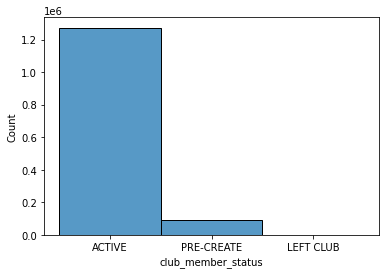

In [14]:
sns.histplot(customer['club_member_status'])

<AxesSubplot:xlabel='fashion_news_frequency', ylabel='Count'>

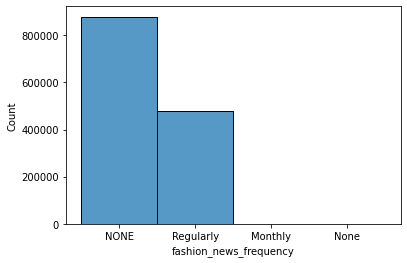

In [15]:
sns.histplot(customer['fashion_news_frequency'])

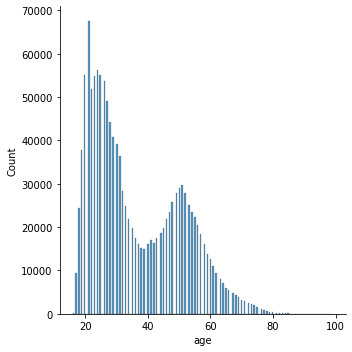

In [16]:
sns.displot(customer['age'])

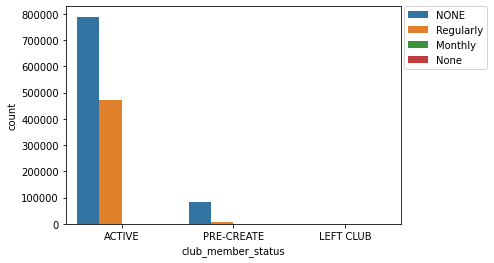

In [17]:
sns.countplot(x='club_member_status',data=customer,hue='fashion_news_frequency')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

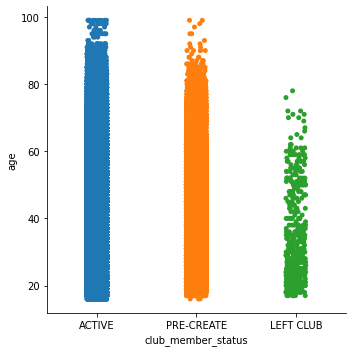

In [18]:
sns.catplot(x='club_member_status',y='age', data=customer)

<AxesSubplot:xlabel='club_member_status', ylabel='age'>

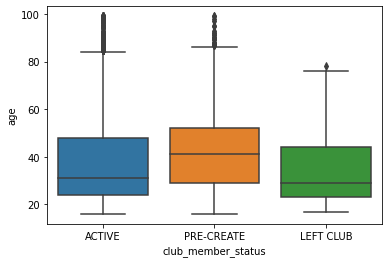

In [19]:
sns.boxplot(x='club_member_status',y='age',data=customer)

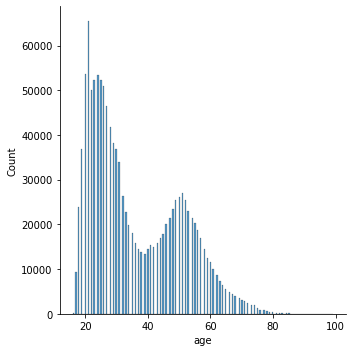

In [20]:
sns.displot(customer[customer.club_member_status == 'ACTIVE']['age'])

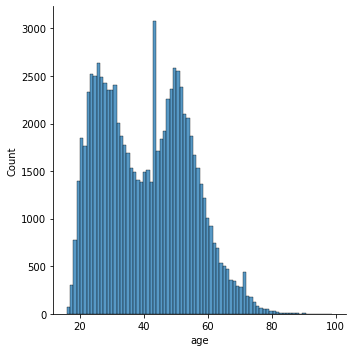

In [21]:
sns.displot(customer[customer.club_member_status == 'PRE-CREATE']['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

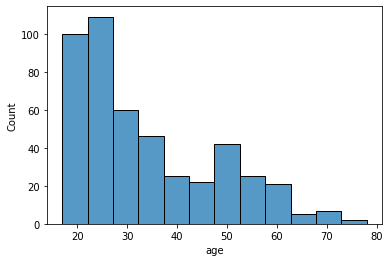

In [22]:
sns.histplot(customer[customer.club_member_status == 'LEFT CLUB']['age'])

In [23]:
print(customer['age'].max())
print(customer['age'].min())

99.0
16.0


Transaction Dataset

In [24]:
100*train_df.isnull().sum()/train_df.shape[0]

t_dat               0.0
customer_id         0.0
article_id          0.0
price               0.0
sales_channel_id    0.0
dtype: float64

In [25]:
train_df.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [26]:
train_df.shape

(31788324, 5)

In [27]:
train_df[train_df.duplicated()]

,t_dat,customer_id,article_id,price,sales_channel_id
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0501820043,0.016932,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0671505001,0.033881,2
20,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
21,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
22,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,0631848002,0.033881,2
...,...,...,...,...,...
31788268,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,0885315003,0.050102,2
31788269,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,0885315003,0.050102,2
31788282,2020-09-22,ff6f55a51af284b71dcd264396b299e548f968c1769e71...,0919786002,0.042356,2
31788292,2020-09-22,ff94f31e864d9b655643ac4d2adab3611c7241adb5d34c...,0901666001,0.084729,2


In [28]:
train_df[(train_df.t_dat == '2018-09-20') & 
         (train_df.article_id == 501820043) &
         (train_df.customer_id == '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8')]

,t_dat,customer_id,article_id,price,sales_channel_id


In [29]:
purchases_counts = train_df['article_id'].value_counts().reset_index()
purchases_counts.columns = ['article_id', 'qty']

Highly Purchased Articles

In [30]:
purchases_counts.head(10)

,article_id,qty
0,0706016001,50287
1,0706016002,35043
2,0372860001,31718
3,0610776002,30199
4,0759871002,26329
5,0464297007,25025
6,0372860002,24458
7,0610776001,22451
8,0399223001,22236
9,0706016003,21241


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0706016001'),
  Text(1, 0, '0706016002'),
  Text(2, 0, '0372860001'),
  Text(3, 0, '0610776002'),
  Text(4, 0, '0759871002'),
  Text(5, 0, '0464297007'),
  Text(6, 0, '0372860002'),
  Text(7, 0, '0610776001'),
  Text(8, 0, '0399223001'),
  Text(9, 0, '0706016003')])

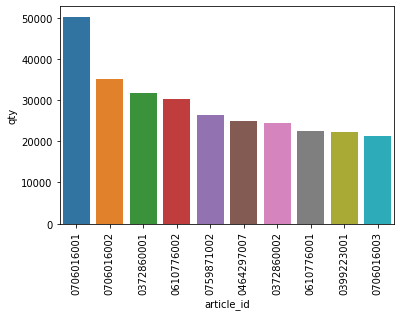

In [31]:
sns.barplot(x = 'article_id',
            y = 'qty',
            data = purchases_counts.head(10))
plt.xticks(rotation=90)

Least Purcahsed Articles

In [32]:
purchases_counts.tail(10)

,article_id,qty
104537,0621558004,1
104538,0240840032,1
104539,0534359001,1
104540,0653909001,1
104541,0591833010,1
104542,0520736002,1
104543,0619777003,1
104544,0586904003,1
104545,0512385003,1
104546,0533261032,1


Top Customers Based on Items Purchased

In [33]:
customer_purchase_count = train_df['customer_id'].value_counts().reset_index()
customer_purchase_count.columns  = ['customer_id', 'items_purchased']

Top 10 Customers Based on Items Purchased

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b'),
  Text(1, 0, 'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71'),
  Text(2, 0, '49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f'),
  Text(3, 0, 'a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc'),
  Text(4, 0, 'cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6'),
  Text(5, 0, '55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d'),
  Text(6, 0, 'c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa'),
  Text(7, 0, '8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076'),
  Text(8, 0, '03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296'),
  Text(9, 0, '6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55')])

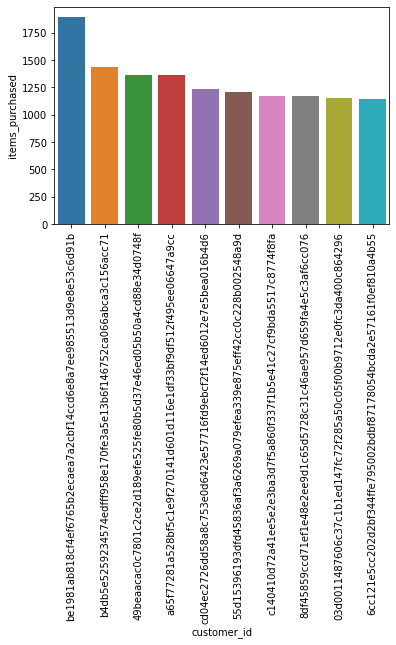

In [34]:
sns.barplot(x = 'customer_id',
            y = 'items_purchased',
            data = customer_purchase_count.head(10))
plt.xticks(rotation=90)

Top 10 Customers based on Sales Amount

In [35]:
sales = train_df.groupby(['customer_id'])['price'].sum().reset_index()

In [36]:
sales.sort_values(by = 'price', ascending = False, inplace = True)
sales.reset_index(drop=True)

,customer_id,price
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.676407
1,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.921186
2,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,49.967169
3,191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...,47.682017
4,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.662000
...,...,...
1362276,7ba686bcc845f1ea49b00e32c98cf6d9132fc29395a580...,0.000847
1362277,6ca58871020638aa7a7341b8108bf94c6de9258dde91dc...,0.000847
1362278,a2efffd45ccdc46ea647c1e18037200934b7c250a5f211...,0.000847
1362279,b6345f8bf3fdb4a9833a812e11aaebfd6e2f256e8834d4...,0.000847


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b'),
  Text(1, 0, 'a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc'),
  Text(2, 0, '03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296'),
  Text(3, 0, '191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f46466ffe90664f73ec96e'),
  Text(4, 0, 'b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71'),
  Text(5, 0, '6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55'),
  Text(6, 0, 'f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a'),
  Text(7, 0, 'e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf6e266b80c87d54245a'),
  Text(8, 0, '863f0e03da282ae32a76775ce55d8a4605a85c84a26066e1ad0e9469e8c40e68'),
  Text(9, 0, 'cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6')])

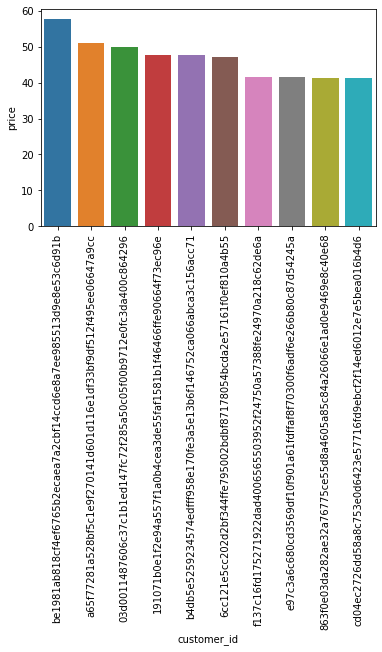

In [37]:
sns.barplot(x = 'customer_id',
            y = 'price',
            data = sales.head(10))
plt.xticks(rotation=90)

Top 10 Articles by Sales

In [38]:
sales_articles = train_df.groupby(['article_id'])['price'].sum().reset_index()
sales_articles.sort_values(by = 'price', ascending = False, inplace = True)
sales_articles.reset_index(drop=True)

,article_id,price
0,0706016001,1631.732102
1,0706016002,1136.321085
2,0568601006,939.268593
3,0448509014,781.478390
4,0706016003,692.195915
...,...,...
104542,0407663007,0.000678
104543,0520431003,0.000678
104544,0405310006,0.000475
104545,0569052001,0.000441


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0706016001'),
  Text(1, 0, '0706016002'),
  Text(2, 0, '0568601006'),
  Text(3, 0, '0448509014'),
  Text(4, 0, '0706016003'),
  Text(5, 0, '0399223001'),
  Text(6, 0, '0720125001'),
  Text(7, 0, '0562245046'),
  Text(8, 0, '0751471001'),
  Text(9, 0, '0562245001')])

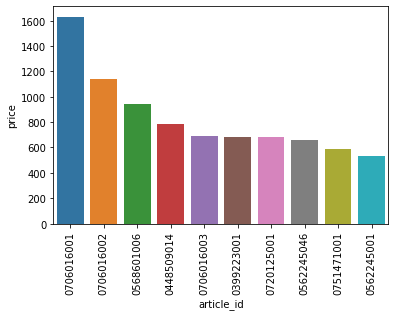

In [39]:
sns.barplot(x = 'article_id',
            y = 'price',
            data = sales_articles.head(10))
plt.xticks(rotation=90)

Articles Dataset

In [40]:
100*articles_df.isnull().sum()/articles_df.shape[0]

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [41]:
articles_df.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
sales_count              

In [42]:
articles_df.shape

(105542, 28)